In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_1 = pd.read_csv('/content/coin_gecko_2022-03-16.csv')
df_2 = pd.read_csv('/content/coin_gecko_2022-03-17.csv')

In [4]:
df_1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [6]:
df_2.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [7]:
df_1.shape, df_2.shape

((500, 9), (500, 9))

In [8]:
df = pd.concat([df_1, df_2])

In [9]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [10]:
df.shape

(1000, 9)

In [11]:
df_copy = df.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 110.4+ KB


In [13]:
df.isnull().sum()

,0
coin,0
symbol,0
price,0
1h,7
24h,7
7d,8
24h_volume,7
mkt_cap,0
date,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': '1h'}>],
       [<Axes: title={'center': '24h'}>, <Axes: title={'center': '7d'}>],
       [<Axes: title={'center': '24h_volume'}>,
        <Axes: title={'center': 'mkt_cap'}>]], dtype=object)

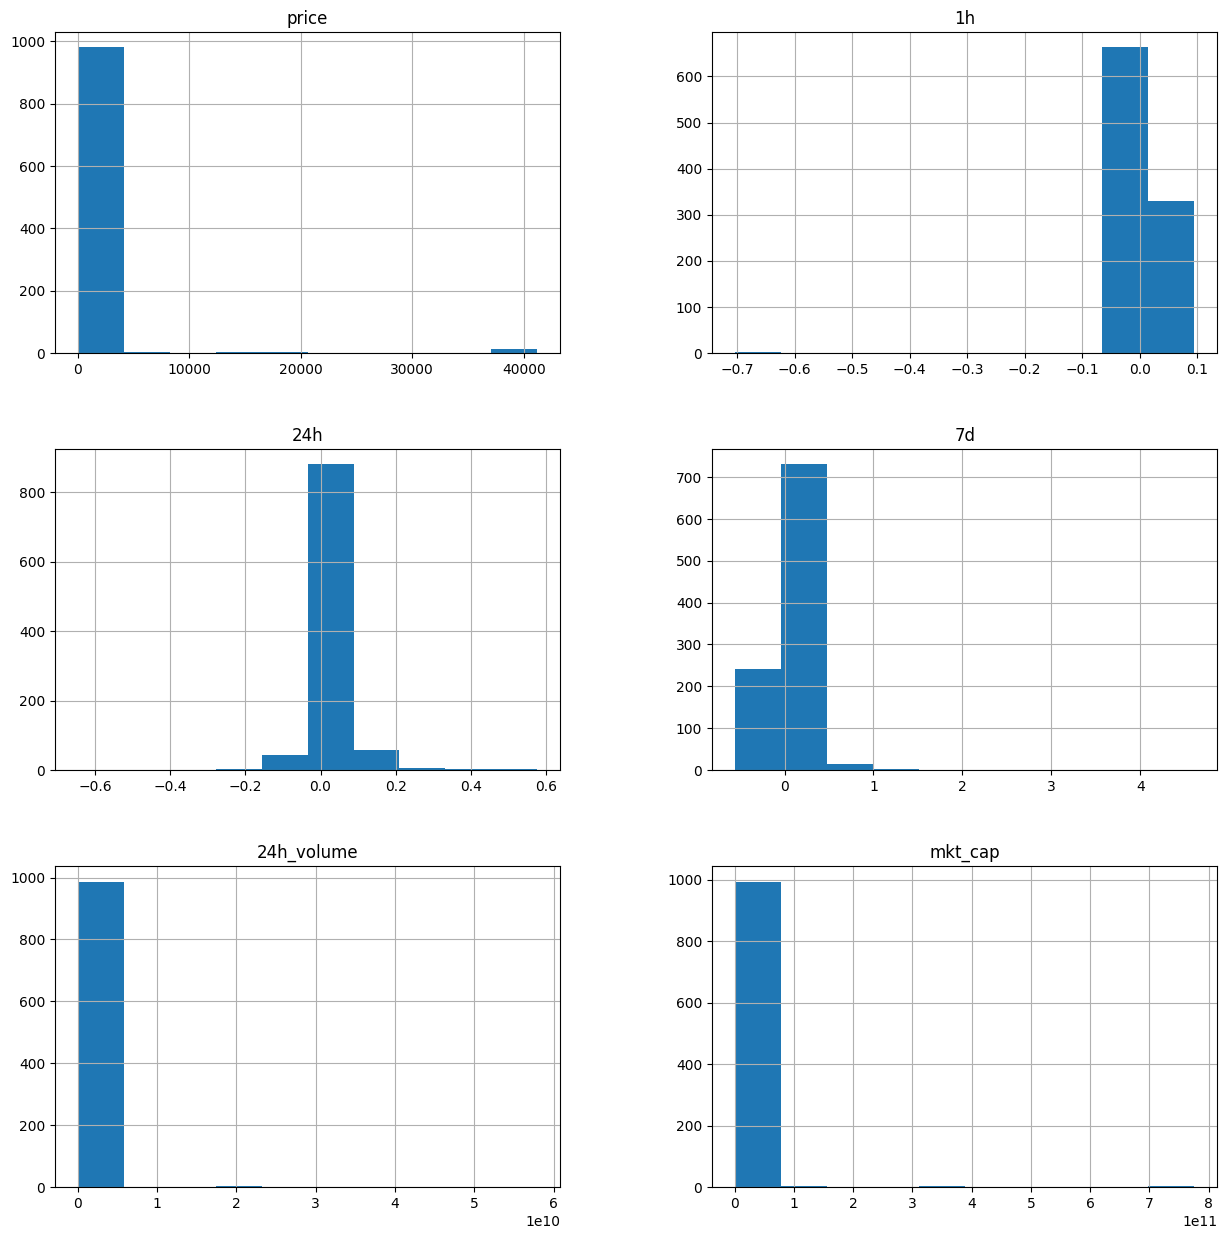

In [16]:
df.hist(figsize=(15,15))

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(992, 9)

In [19]:
df['date'] = pd.to_datetime(df['date']).astype('datetime64[ns]') #Make it date time

In [20]:
#seperate in date time features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [21]:
df.drop('date', axis=1, inplace=True) # drop the original coloum

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        992 non-null    object 
 1   symbol      992 non-null    object 
 2   price       992 non-null    float64
 3   1h          992 non-null    float64
 4   24h         992 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  992 non-null    float64
 7   mkt_cap     992 non-null    float64
 8   day         992 non-null    int32  
 9   month       992 non-null    int32  
 10  year        992 non-null    int32  
dtypes: float64(6), int32(3), object(2)
memory usage: 81.4+ KB


In [23]:
df.coin.unique()

array(['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin', 'XRP', 'Terra',
       'Solana', 'Cardano', 'Polkadot', 'Avalanche', 'Binance USD',
       'Dogecoin', 'TerraUSD', 'Shiba Inu', 'Wrapped Bitcoin', 'Cronos',
       'Polygon', 'Dai', 'Cosmos Hub', 'Litecoin', 'Lido Staked Ether',
       'Near', 'Chainlink', 'TRON', 'FTX Token', 'Bitcoin Cash',
       'LEO Token', 'OKB', 'Algorand', 'Stellar', 'Uniswap', 'Hedera',
       'Axie Infinity', 'Decentraland', 'Ethereum Classic', 'Elrond',
       'The Sandbox', 'Internet Computer', 'Monero', 'cETH', 'VeChain',
       'Fantom', 'Filecoin', 'Osmosis', 'Klaytn', 'Frax', 'Waves',
       'Theta Network', 'Magic Internet Money', 'The Graph', 'Tezos',
       'cUSDC', 'Helium', 'THORChain', 'EOS', 'ECOMI', 'IOTA', 'cDAI',
       'Flow', 'Theta Fuel', 'Aave', 'Zcash', 'Maker', 'JUNO', 'Gala',
       'BitTorrent', 'Arweave', 'Huobi BTC', 'PancakeSwap', 'Quant',
       'Harmony', 'eCash', 'Bitcoin SV', 'NEO', 'TrueUSD', 'Huobi Token',
       'KuCo

In [24]:
num_unique_coins = df['coin'].nunique()
print(f"The number of unique coins is: {num_unique_coins}")

The number of unique coins is: 502


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']
scaler = MinMaxScaler()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': '1h'}>, <Axes: title={'center': '24h'}>],
       [<Axes: title={'center': '7d'}>,
        <Axes: title={'center': '24h_volume'}>,
        <Axes: title={'center': 'mkt_cap'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

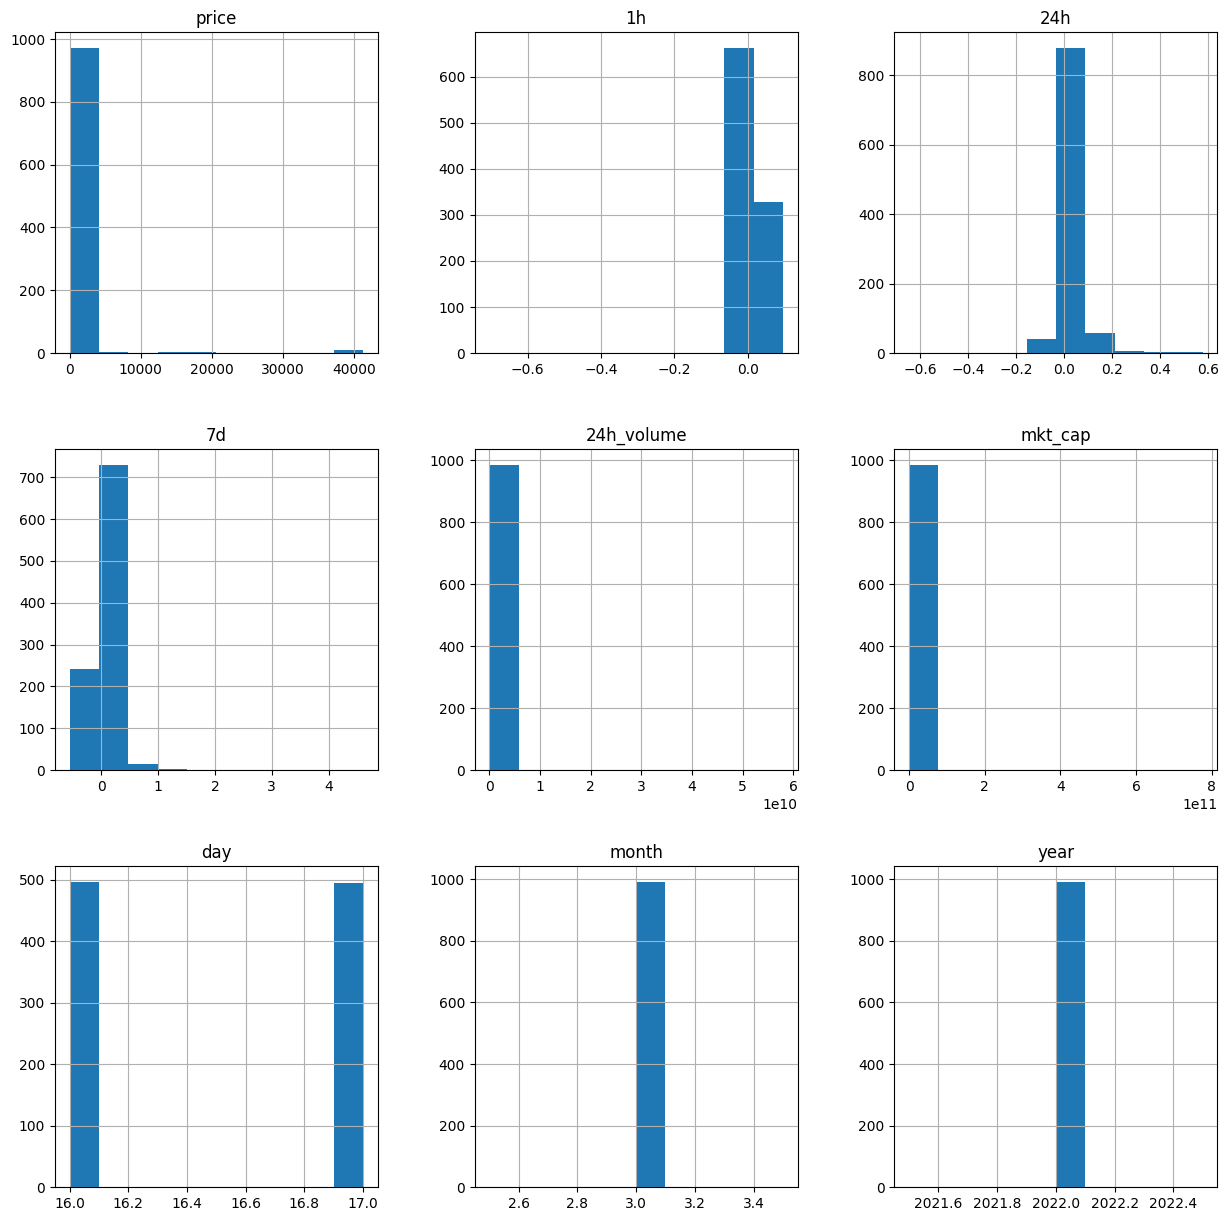

In [26]:
df.hist(figsize=(15,15))

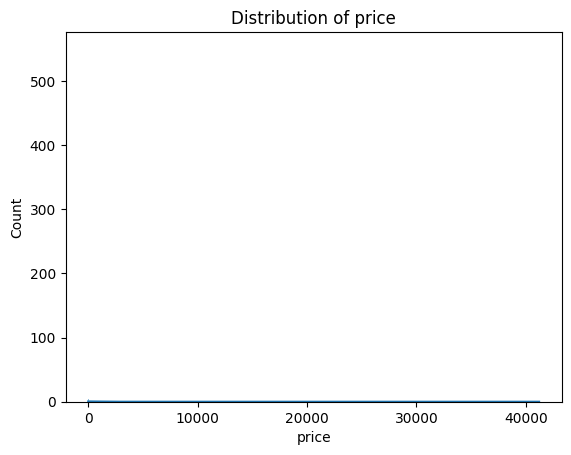

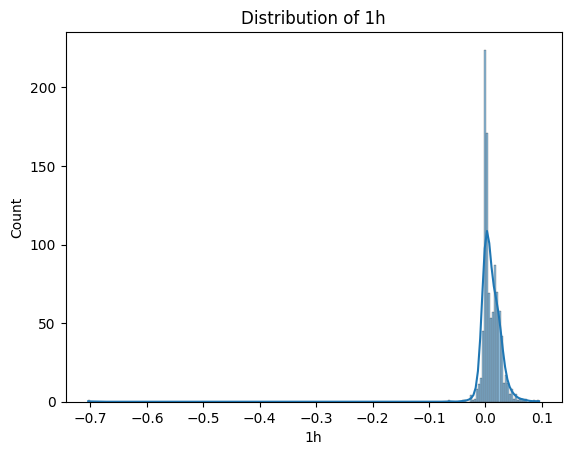

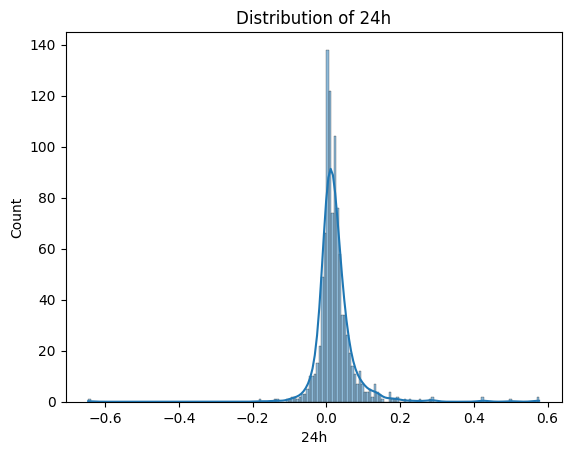

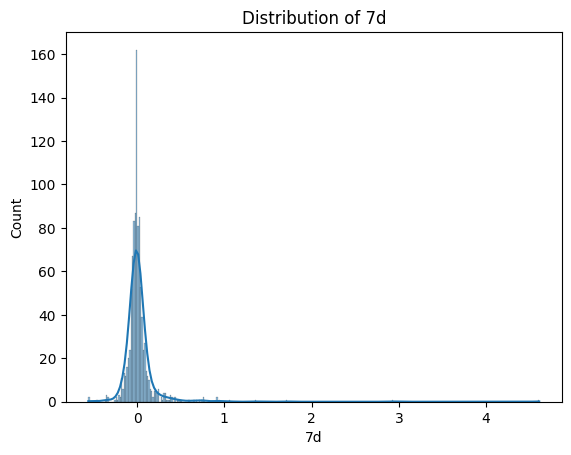

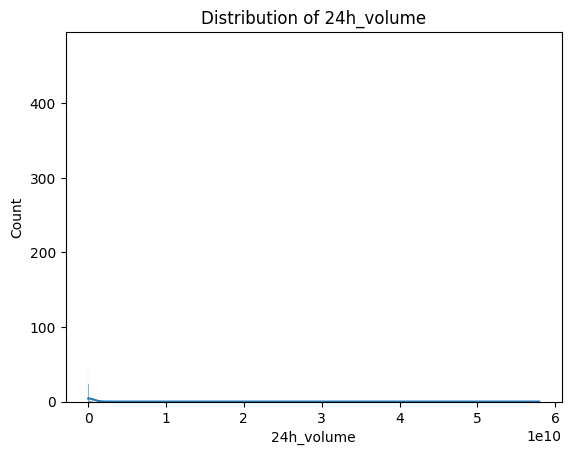

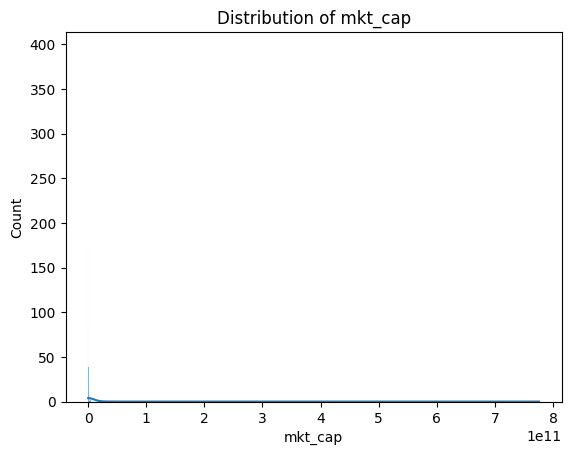

In [27]:
for i in numerical_cols:
  sns.histplot(df[i], kde=True)
  plt.title(f'Distribution of {i}')
  plt.show()

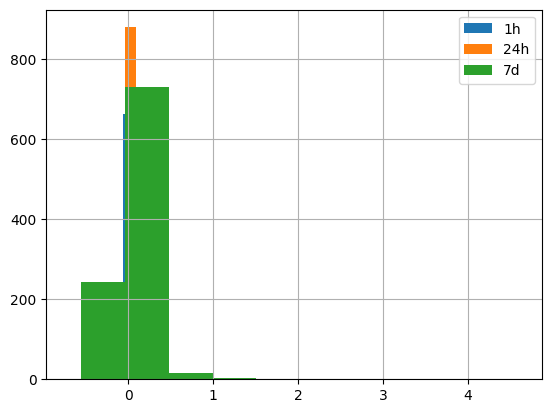

In [28]:
df['1h'].hist()
df['24h'].hist()
df['7d'].hist()
plt.legend(['1h', '24h', '7d'])
plt.show()

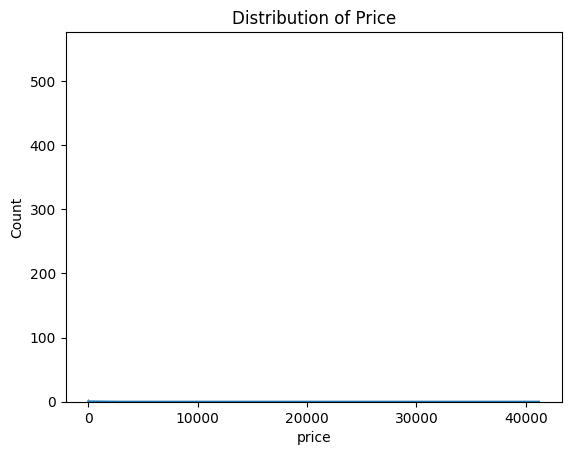

In [29]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

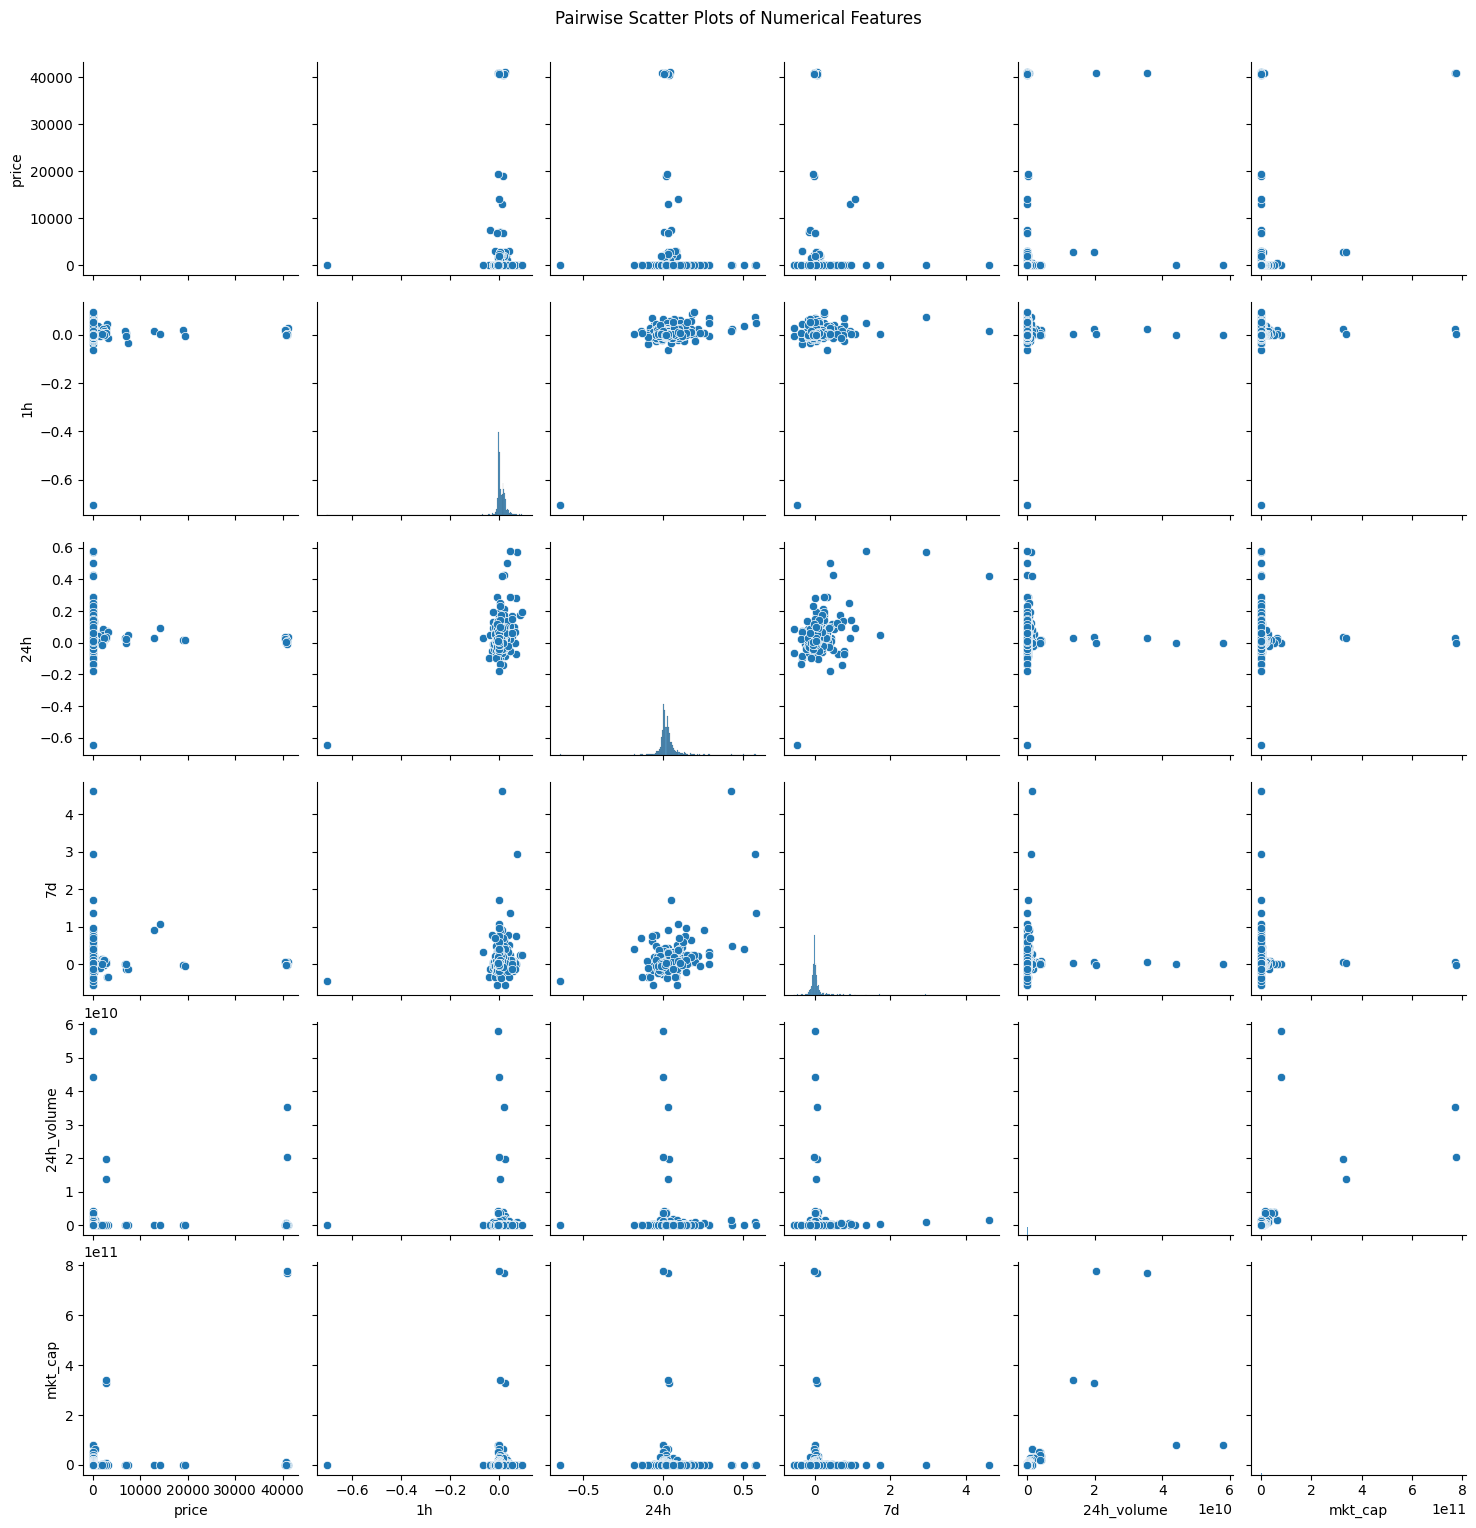

In [30]:
# Create scatter plots for selected numerical features
sns.pairplot(df, vars=numerical_cols)
plt.suptitle('Pairwise Scatter Plots of Numerical Features', y=1.02)
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical columns for VIF calculation
X = df[numerical_cols]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
display(vif_data)

,feature,VIF
0,price,1.186318
1,1h,1.392297
2,24h,1.763021
3,7d,1.320327
4,24h_volume,1.580115
5,mkt_cap,1.792764


As the VIF is all below 2 so we can conclude that there is no significant multicolliniearity between the features.

Text(0, 0.5, '1h')

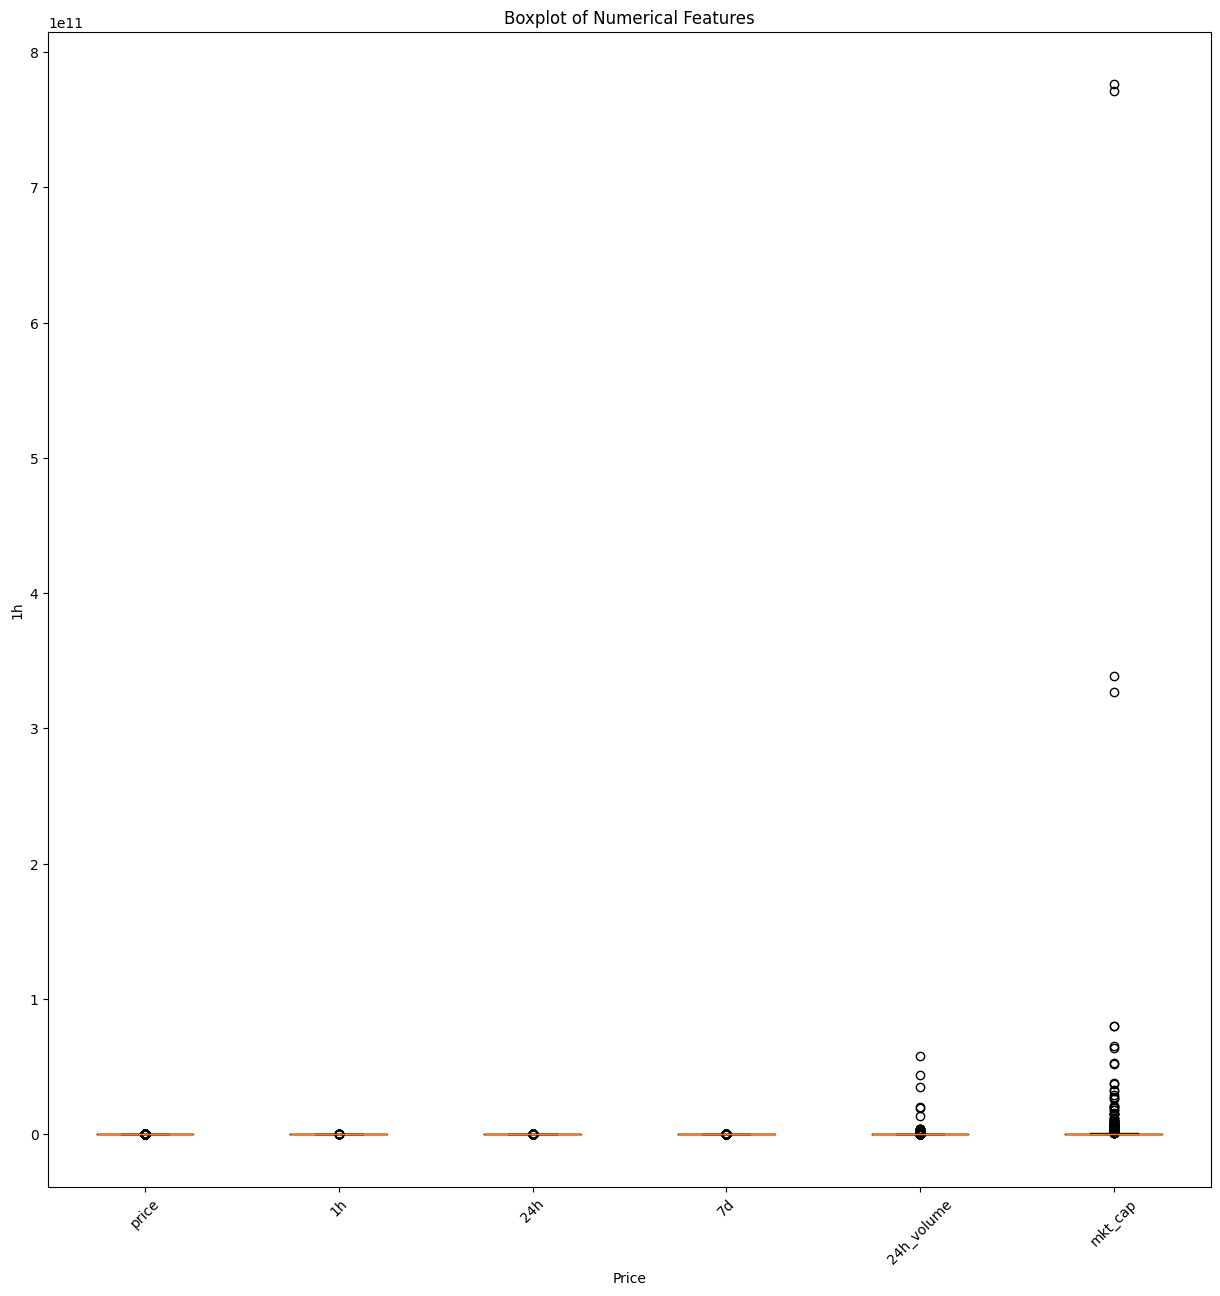

In [32]:
plt.figure(figsize=(15,15))
plt.boxplot(df[numerical_cols])
plt.xticks(range(1, len(numerical_cols) + 1), numerical_cols, rotation=45)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Price')
plt.ylabel('1h')

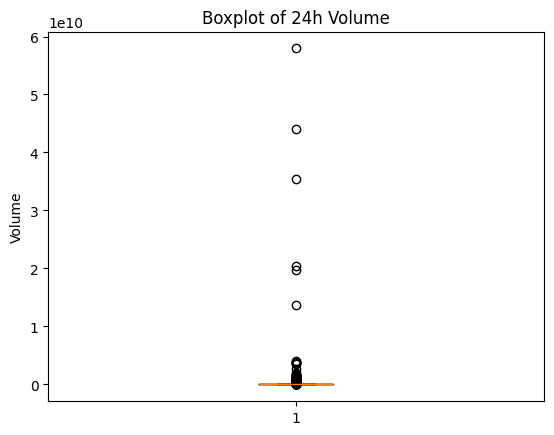

In [33]:
plt.boxplot(df["24h_volume"])
plt.title("Boxplot of 24h Volume")
plt.ylabel("Volume")
plt.show()

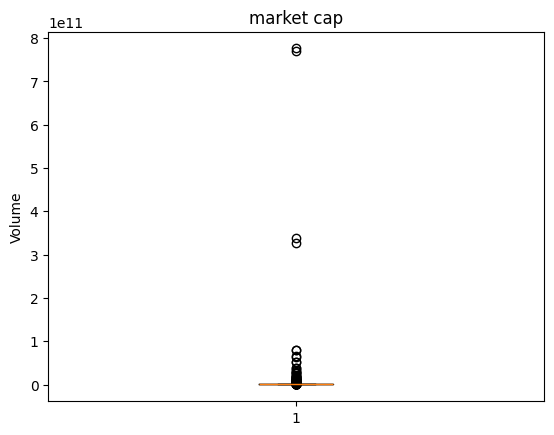

In [34]:
plt.boxplot(df["mkt_cap"])
plt.title("market cap")
plt.ylabel("Volume")
plt.show()

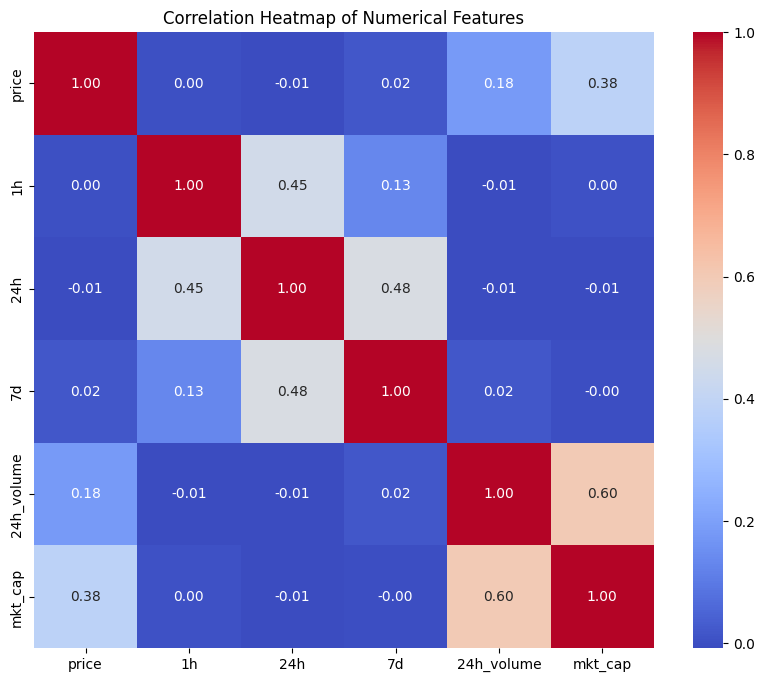

In [36]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Univariate Analysis Conclusions:

Most cryptocurrencies in the dataset have low prices, 24h trading volumes, and market capitalizations, with a few notable exceptions having significantly higher values (e.g., Bitcoin, Ethereum).
The percentage changes in price over 1 hour, 24 hours, and 7 days are mostly clustered around zero, indicating relative stability for many coins during this period, but there are outliers with larger fluctuations.

Bivariate Analysis Conclusions:

There is a moderate positive correlation between price and market capitalization.
There is a moderate positive correlation between 24h trading volume and market capitalization.
The correlations between the percentage price change metrics (1h, 24h, 7d) are relatively weak.

Multivariate Analysis Conclusions:

The numerical features in the dataset do not exhibit significant multicollinearity based on the VIF values, which are all below the common threshold of 5.

In [37]:
# Apply normalization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the normalized DataFrame
display(df.head())

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,day,month,year
0,Bitcoin,BTC,0.991319,0.908636,0.552739,0.118660,0.610870,0.993446,16,3,2022
1,Ethereum,ETH,0.066584,0.911139,0.556010,0.120596,0.340877,0.421435,16,3,2022
2,Tether,USDT,0.000024,0.879850,0.527392,0.108014,1.000000,0.102962,16,3,2022
3,BNB,BNB,0.009303,0.903630,0.551104,0.108788,0.024093,0.082445,16,3,2022
4,USD Coin,USDC,0.000024,0.879850,0.528209,0.108014,0.066838,0.067211,16,3,2022


In [38]:
df.shape

(992, 11)

In [39]:
#outlier treatment for 24_h and marketcap features as they have a lot of outliers
for col in ['24h_volume', 'mkt_cap']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the shape of the DataFrame after outlier treatment
display(df.shape)

(754, 11)

In [40]:
# Sort by coin and date for time-series calculations
df.sort_values(by=['coin', 'year', 'month', 'day'], inplace=True)

# Create moving averages (e.g., 2-day moving average of price)
df['price_moving_average_2d'] = df.groupby('coin')['price'].transform(lambda x: x.rolling(window=2).mean())

# Create volatility (e.g., 2-day rolling standard deviation of price)
df['price_volatility_2d'] = df.groupby('coin')['price'].transform(lambda x: x.rolling(window=2).std())

# Create a simple liquidity ratio (e.g., 24h_volume / mkt_cap)
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

# Display the first few rows with the new features
display(df.head())

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,day,month,year,price_moving_average_2d,price_volatility_2d,liquidity_ratio
158,0x,ZRX,0.000012,0.912390,0.556827,0.113434,0.000506,0.000467,16,3,2022,NaN,NaN,1.083999
159,0x,ZRX,0.000013,0.884856,0.541292,0.106078,0.000418,0.000481,17,3,2022,0.000012,1.435752e-07,0.869077
122,1inch,1INCH,0.000036,0.891114,0.525756,0.124855,0.001107,0.000711,17,3,2022,NaN,NaN,1.557259
376,AIOZ Network,AIOZ,0.000006,0.939925,0.762878,0.154665,0.000237,0.000062,16,3,2022,NaN,NaN,3.792763
411,AIOZ Network,AIOZ,0.000005,0.866083,0.450531,0.087302,0.000095,0.000048,17,3,2022,0.000005,3.917480e-07,1.968526


Train an XGBoost model to predict the target variable using the prepared features and evaluate its performance.

Define the features (X) and target (y) variables, and split the data into training and testing sets.


Define the features and target variables, and split the data into training and testing sets.



In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (603, 11)
Shape of X_test: (151, 11)
Shape of y_train: (603,)
Shape of y_test: (151,)


In [44]:
print("NaN count:\n", np.isnan(X_train).sum())
print("Inf count:\n", np.isinf(X_train).sum())

NaN count:
 1h                           0
24h                          0
7d                           0
24h_volume                   0
mkt_cap                      0
day                          0
month                        0
year                         0
price_moving_average_2d    315
price_volatility_2d        315
liquidity_ratio              0
dtype: int64
Inf count:
 1h                         0
24h                        0
7d                         0
24h_volume                 0
mkt_cap                    0
day                        0
month                      0
year                       0
price_moving_average_2d    0
price_volatility_2d        0
liquidity_ratio            1
dtype: int64


In [57]:
# Handle NaN values in moving average and volatility columns by filling with the mean
X_train['price_moving_average_2d'].fillna(X_train['price_moving_average_2d'].mean(), inplace=True)
X_test['price_moving_average_2d'].fillna(X_train['price_moving_average_2d'].mean(), inplace=True)

X_train['price_volatility_2d'].fillna(X_train['price_volatility_2d'].mean(), inplace=True)
X_test['price_volatility_2d'].fillna(X_train['price_volatility_2d'].mean(), inplace=True)

# Handle Inf values in 'liquidity_ratio' by replacing with NaN and then filling with the mean
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train['liquidity_ratio'].fillna(X_train['liquidity_ratio'].mean(), inplace=True)
X_test['liquidity_ratio'].fillna(X_train['liquidity_ratio'].mean(), inplace=True)

# Verify that there are no more NaN or Inf values
print("NaN count after handling:\n", X_train.isnull().sum())
print("Inf count after handling:\n", np.isinf(X_train).sum())

NaN count after handling:
 1h                         0
24h                        0
7d                         0
24h_volume                 0
mkt_cap                    0
day                        0
month                      0
year                       0
price_moving_average_2d    0
price_volatility_2d        0
liquidity_ratio            0
dtype: int64
Inf count after handling:
 1h                         0
24h                        0
7d                         0
24h_volume                 0
mkt_cap                    0
day                        0
month                      0
year                       0
price_moving_average_2d    0
price_volatility_2d        0
liquidity_ratio            0
dtype: int64


In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [53]:
model = XGBRegressor()
model.fit(X_train, y_train) #fit the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
y_pred = model.predict(X_test)

In [59]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02423750126024676
Mean Squared Error: 0.012093002141633018
Root Mean Squared Error: 0.10996818695255924


In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", np.sqrt(-grid_search.best_score_))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE found:  0.08110632811315376


In [61]:
# Make predictions on the test set using the best model from GridSearchCV
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model's performance
print('Tuned Model Evaluation:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tuned))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_tuned))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_tuned)))

Tuned Model Evaluation:
Mean Absolute Error: 0.01570300576187886
Mean Squared Error: 0.006640375506731024
Root Mean Squared Error: 0.08148849922983625


In [63]:
# app.py
import pickle
from flask import Flask, request, jsonify

In [66]:
# Save the trained model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)

In [69]:
app = Flask(__name__)

In [70]:
@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json(force=True)
    features = np.array(data["features"]).reshape(1, -1)  # input as list
    prediction = model.predict(features)
    return jsonify({"prediction": prediction.tolist()})

In [ ]:
if __name__ == "__main__":
    # This part is for running the Flask development server.
    # Running a Flask server directly in a Colab notebook cell
    # like this can lead to the "Working outside of request context" error
    # or other issues.
    # For testing, you might need to run this in a separate process
    # or use a tool like ngrok to expose the local server.
    # If you have flask-ngrok installed, you could use run_with_ngrok(app).
    print("Flask app defined. To run the app, you might need to execute this script")
    print("in a separate environment or use a tool like ngrok in Colab.")
    # app.run(debug=True) # Commenting this out to avoid the error

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Cons